# Introduction
In this notebook..<br>
source: https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb<br>
The original text by the author is written in gray to improve readability<br>
Support: used chatgpt and github copilot

# Change Log
Summary of the changes made:
<ol>
    <li>All the comments added into the code</li>
    <li>Added a section in which I test out the Kmeans clustering algorithm provided here</li>
    <li>Added a section in which I test out the Spectral clustering algorithm provided here</li>
    <li>Added an example in which I make a customer segmentation model</li>
</ol>

# <span style="color: grey;">In Depth: k-Means Clustering


<span style="color: grey;">
In the previous chapters we explored unsupervised machine learning models for dimensionality reduction.
Now we will move on to another class of unsupervised machine learning models: clustering algorithms.
Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.<br>

Many clustering algorithms are available in Scikit-Learn and elsewhere, but perhaps the simplest to understand is an algorithm known as *k-means clustering*, which is implemented in `sklearn.cluster.KMeans`.

We begin with the standard imports:
</span>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid') # Changed the style since original wasn't working
import numpy as np

## <span style="color: grey;">Introducing k-Means

<span style="color: grey;">
The *k*-means algorithm searches for a predetermined number of clusters within an unlabeled multidimensional dataset.
It accomplishes this using a simple conception of what the optimal clustering looks like:

- The *cluster center* is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the *k*-means model.
We will soon dive into exactly *how* the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the *k*-means result.

First, let's generate a two-dimensional dataset containing four distinct blobs.
To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization (see the following figure):
</span>

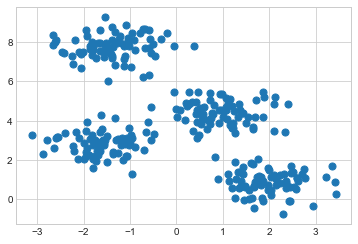

In [ ]:
from sklearn.datasets import make_blobs
# The make_blobs function is used to generate a dataset of points that are clustered together
# The parameters passed into it mean the following:
# 300 = number of points
# centers=4 = number of clusters
# random_state=0 = random seed
# cluster_std=0.60 = standard deviation of the clusters
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

<span style="color: grey;">
By eye, it is relatively easy to pick out the four clusters.
The *k*-means algorithm does this automatically, and in Scikit-Learn uses the typical estimator API:
</span>

In [ ]:
from sklearn.cluster import KMeans
# The number of clusters for the model was set at 4
kmeans = KMeans(n_clusters=4)
# The model was fit to the data and clusters predicted
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

<span style="color: grey;">
Let's visualize the results by plotting the data colored by these labels (the following figure).
We will also plot the cluster centers as determined by the *k*-means estimator:
</span>

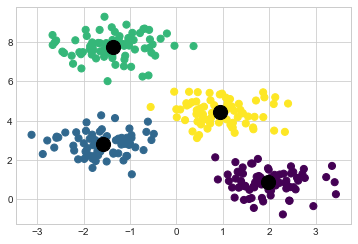

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# The clusters are dsiplayed
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);

<span style="color: grey;">
The good news is that the *k*-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye.
But you might wonder how this algorithm finds these clusters so quickly: after all, the number of possible combinations of cluster assignments is exponential in the number of data points—an exhaustive search would be very, very costly.<br>
Fortunately for us, such an exhaustive search is not necessary: instead, the typical approach to *k*-means involves an intuitive iterative approach known as *expectation–maximization*.
</span>

## <span style="color: grey;">Expectation–Maximization

<span style="color: grey;">
Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science.
*k*-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here.
In short, the expectation–maximization approach here consists of the following procedure:

1. Guess some cluster centers.
2. Repeat until converged:
   1. *E-step*: Assign points to the nearest cluster center.
   2. *M-step*: Set the cluster centers to the mean of their assigned points.

Here the *E-step* or *expectation step* is so named because it involves updating our expectation of which cluster each point belongs to.
The *M-step* or *maximization step* is so named because it involves maximizing some fitness function that defines the locations of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

The literature about this algorithm is vast, but can be summarized as follows: under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.

We can visualize the algorithm as shown in the following figure.
For the particular initialization shown here, the clusters converge in just three iterations.
(For an interactive version of this figure, refer to the code in the online [appendix](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/06.00-Figure-Code.ipynb#Interactive-K-Means).)
</span>

<span style="color: grey;">
![(run code in Appendix to generate image)](images/05.11-expectation-maximization.png)
[figure source in Appendix](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/06.00-Figure-Code.ipynb#Expectation-Maximization)
</span>

<span style="color: grey;">
The *k*-means algorithm is simple enough that we can write it in a few lines of code.
The following is a very basic implementation (see the following figure):
</span>

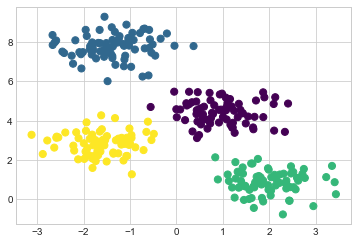

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

# This function is used to predict where the clusters could be 
# X - the data set
# n_clusters - the number of clusters
# rseed=2 the seed for the random number generator
def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

<span style="color: grey;">
Most well-tested implementations will do a bit more than this under the hood, but the preceding function gives the gist of the expectation–maximization approach.
</span>

<span style="color: grey;">
There are a few caveats to be aware of when using the expectation–maximization algorithm:
</span>

#### <span style="color: grey;">The globally optimal result may not be achieved
<span style="color: grey;">
First, although the E–M procedure is guaranteed to improve the result in each step, there is no assurance that it will lead to the *global* best solution.
For example, if we use a different random seed in our simple procedure, the particular starting guesses lead to poor results (see the following figure):
</span>

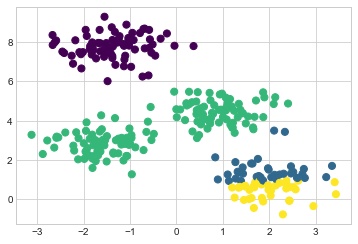

In [ ]:
# The seed is changed to show how it affects the finding of clusters
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

<span style="color: grey;">
Here the E–M approach has converged, but has not converged to a globally optimal configuration. For this reason, it is common for the algorithm to be run for multiple starting guesses, as indeed Scikit-Learn does by default (the number is set by the ``n_init`` parameter, which defaults to 10).
</span>

#### <span style="color: grey;">The number of clusters must be selected beforehand
<span style="color: grey;">
Another common challenge with *k*-means is that you must tell it how many clusters you expect: it cannot learn the number of clusters from the data.
For example, if we ask the algorithm to identify six clusters, it will happily proceed and find the best six clusters, as shown in Figure 47-6:
</span>

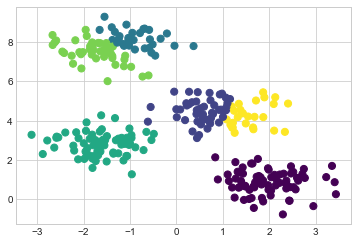

In [ ]:
# The amount of clusters set too high
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

<span style="color: grey;">
Whether the result is meaningful is a question that is difficult to answer definitively; one approach that is rather intuitive, but that we won't discuss further here, is called [silhouette analysis](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).<br>

Alternatively, you might use a more complicated clustering algorithm that has a better quantitative measure of the fitness per number of clusters (e.g., Gaussian mixture models; see [In Depth: Gaussian Mixture Models](05.12-Gaussian-Mixtures.ipynb)) or which *can* choose a suitable number of clusters (e.g., DBSCAN, mean-shift, or affinity propagation, all available in the `sklearn.cluster` submodule).
</span>

#### <span style="color: grey;">k-means is limited to linear cluster boundaries
<span style="color: grey;">
The fundamental model assumptions of *k*-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.<br>

In particular, the boundaries between *k*-means clusters will always be linear, which means that it will fail for more complicated boundaries.
Consider the following data, along with the cluster labels found by the typical *k*-means approach (see the following figure):
</span>

In [ ]:
# Make mooons is used to generate data
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

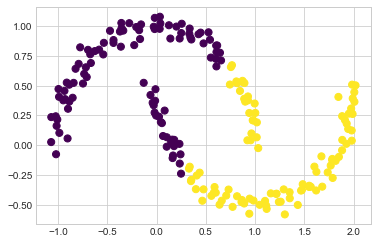

In [ ]:
# 2 clusters are predicted from the above data
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

<span style="color: grey;">
This situation is reminiscent of the discussion in [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb), where we used a kernel transformation to project the data into a higher dimension where a linear separation is possible.<br>
We might imagine using the same trick to allow *k*-means to discover non-linear boundaries.<br>

One version of this kernelized *k*-means is implemented in Scikit-Learn within the ``SpectralClustering`` estimator.
It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a *k*-means algorithm (see the following figure):
</span>

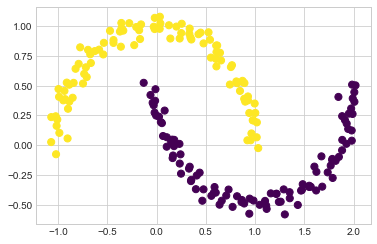

In [ ]:
from sklearn.cluster import SpectralClustering
# A spectralClustering model is used to better fir the data
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

<span style="color: grey;">We see that with this kernel transform approach, the kernelized *k*-means is able to find the more complicated nonlinear boundaries between clusters.</span>

#### <span style="color: grey;">k-means can be slow for large numbers of samples
<span style="color: grey;">
Because each iteration of *k*-means must access every point in the dataset, the algorithm can be relatively slow as the number of samples grows.
You might wonder if this requirement to use all data at each iteration can be relaxed; for example, you might just use a subset of the data to update the cluster centers at each step.
This is the idea behind batch-based *k*-means algorithms, one form of which is implemented in `sklearn.cluster.MiniBatchKMeans`.
The interface for this is the same as for standard `KMeans`; we will see an example of its use as we continue our discussion.
</span>

## Testing out the Algorithms Above

### Make Blobs - Kmeans used

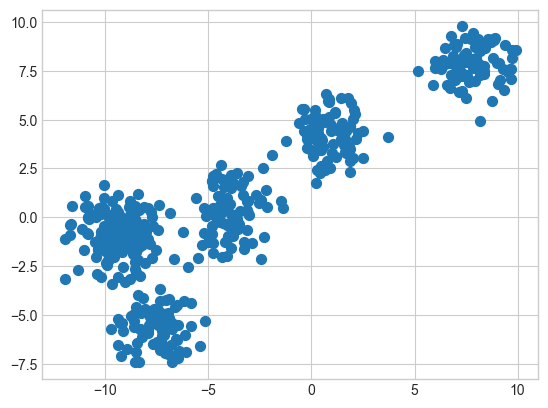

In [12]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=500, centers=6,
                       cluster_std=1, random_state=3)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [14]:
from sklearn.cluster import KMeans
# The number of clusters for the model was set at 4
kmeans = KMeans(n_clusters=5)
# The model was fit to the data and clusters predicted
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

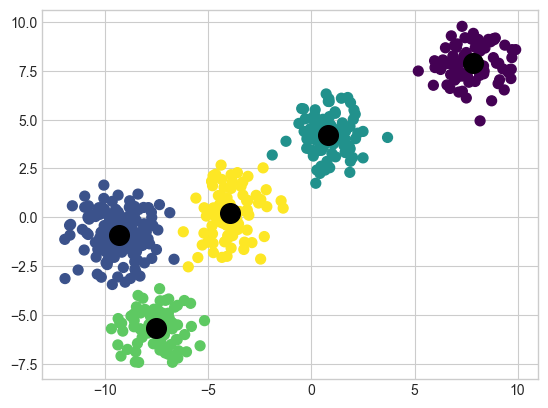

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
# The clusters are dsiplayed
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);

### Make Moons - SpectralClustering Used

Here I add more noise and point for the spectral clustering data from above

In [59]:
# Make mooons is used to generate data
from sklearn.datasets import make_moons
X, y = make_moons(400, noise=.1, random_state=4)

Here I show howw 2 to 6 clusters look on the data from above 

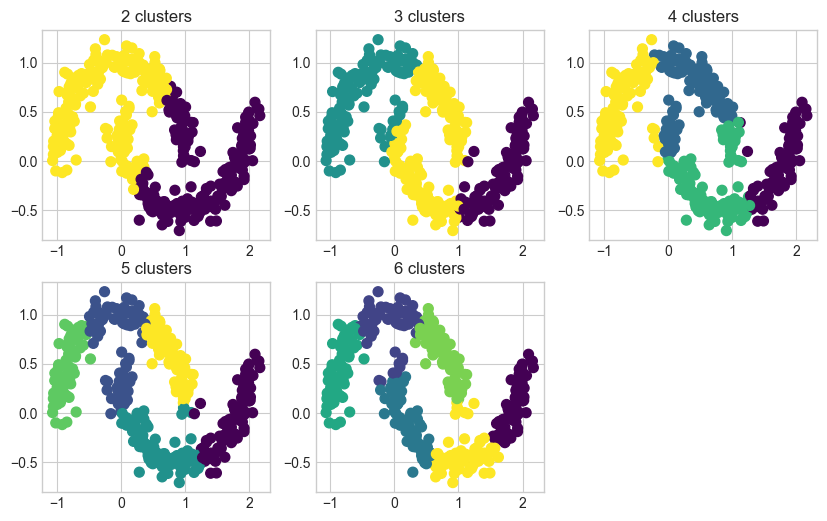

In [68]:
# 2 clusters are predicted from the above data
nclusters =[2, 3, 4, 5, 6]
plt.figure(figsize=(10,6))
i=0
for ncluster in nclusters:
    labels = KMeans(ncluster, random_state=0).fit_predict(X)
    plt.subplot(2, 3, i+1)
    plt.scatter(X[:, 0], X[:, 1], c=labels,
                s=50, cmap='viridis');
    plt.title(str(ncluster) + " clusters")
    i+=1

Here I show howw 2 to 6 clusters look on the data from above using nearest neighbors affinity

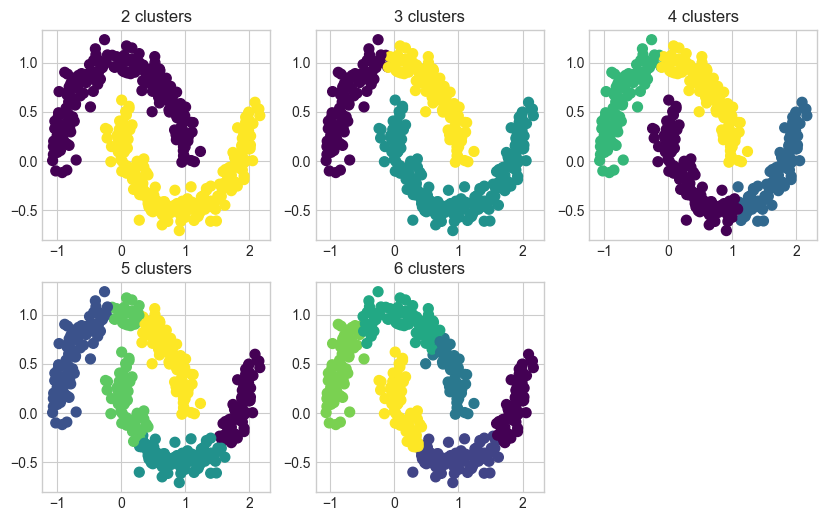

In [69]:
from sklearn.cluster import SpectralClustering
# 2 clusters are predicted from the above data
nclusters =[2, 3, 4, 5, 6]
plt.figure(figsize=(10,6))
i=0
for ncluster in nclusters:
    model = SpectralClustering(n_clusters=ncluster, affinity='nearest_neighbors',
                           assign_labels='kmeans')
    labels = model.fit_predict(X)
    plt.subplot(2, 3, i+1)
    plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
    plt.title(str(ncluster) + " clusters")
    i+=1

## <span style="color: grey;">Examples
<span style="color: grey;">
Being careful about these limitations of the algorithm, we can use *k*-means to our advantage in a variety of situations.
We'll now take a look at a couple of examples.
</span>

### <span style="color: grey;">Example 1: k-Means on Digits
<span style="color: grey;">
To start, let's take a look at applying *k*-means on the same simple digits data that we saw in [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb) and [In Depth: Principal Component Analysis](05.09-Principal-Component-Analysis.ipynb).
Here we will attempt to use *k*-means to try to identify similar digits *without using the original label information*; this might be similar to a first step in extracting meaning from a new dataset about which you don't have any *a priori* label information.<br>

We will start by loading the dataset, then find the clusters.
Recall that the digits dataset consists of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8 × 8 image:
</span>

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

<span style="color: grey;">The clustering can be performed as we did before:</span>

In [12]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

<span style="color: grey;">
The result is 10 clusters in 64 dimensions.
Notice that the cluster centers themselves are 64-dimensional points, and can be interpreted as representing the "typical" digit within the cluster.
Let's see what these cluster centers look like (see the following figure):
</span>

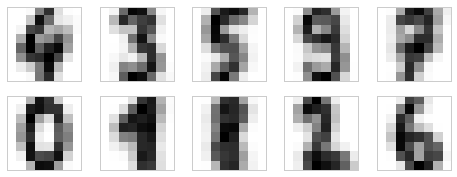

In [13]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

<span style="color: grey;">
We see that *even without the labels*, ``KMeans`` is able to find clusters whose centers are recognizable digits, with perhaps the exception of 1 and 8.

Because *k*-means knows nothing about the identities of the clusters, the 0–9 labels may be permuted.
We can fix this by matching each learned cluster label with the true labels found in the clusters:
</span>

In [14]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

<span style="color: grey;">Now we can check how accurate our unsupervised clustering was in finding similar digits within the data:</span>

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

<span style="color: grey;">
With just a simple *k*-means algorithm, we discovered the correct grouping for 80% of the input digits!
Let's check the confusion matrix for this, visualized in the following figure:
</span>

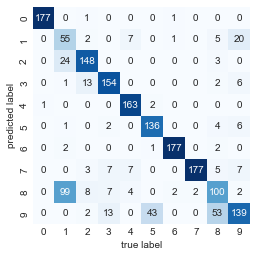

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues',
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

<span style="color: grey;">
As we might expect from the cluster centers we visualized before, the main point of confusion is between the eights and ones.
But this still shows that using *k*-means, we can essentially build a digit classifier *without reference to any known labels*!<br>

Just for fun, let's try to push this even farther.
We can use the t-distributed stochastic neighbor embedding algorithm (mentioned in [In-Depth: Manifold Learning](05.10-Manifold-Learning.ipynb)) to preprocess the data before performing *k*-means.
t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters.
Let's see how it does:
</span>

In [17]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random',
            learning_rate='auto',random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.9415692821368948

<span style="color: grey;">
That's a 94% classification accuracy *without using the labels*.
This is the power of unsupervised learning when used carefully: it can extract information from the dataset that it might be difficult to extract by hand or by eye.
</span>

### <span style="color: grey;">Example 2: k-Means for Color Compression
<span style="color: grey;">
One interesting application of clustering is in color compression within images (this example is adapted from Scikit-Learn's ["Color Quantization Using K-Means"](https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html).
For example, imagine you have an image with millions of colors.
In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.<Br>

For example, consider the image shown in the following figure, which is from the Scikit-Learn `datasets` module (for this to work, you'll have to have the `PIL` Python package installed):
(For a color version of this and following images, see the online version of this book).
</span>

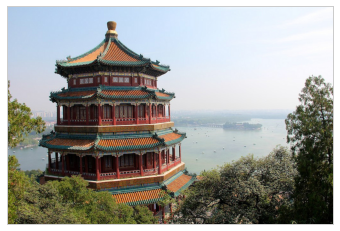

In [18]:
# Note: this requires the PIL package to be installed
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

<span style="color: grey;">
The image itself is stored in a three-dimensional array of size `(height, width, RGB)`, containing red/blue/green contributions as integers from 0 to 255:
</span>

In [19]:
china.shape

(427, 640, 3)

<span style="color: grey;">
One way we can view this set of pixels is as a cloud of points in a three-dimensional color space.
We will reshape the data to `[n_samples, n_features]` and rescale the colors so that they lie between 0 and 1:
</span>

In [20]:
data = china / 255.0  # use 0...1 scale
data = data.reshape(-1, 3)
data.shape

(273280, 3)

<span style="color: grey;">
We can visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency (see the following figure):
</span>

In [21]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.default_rng(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

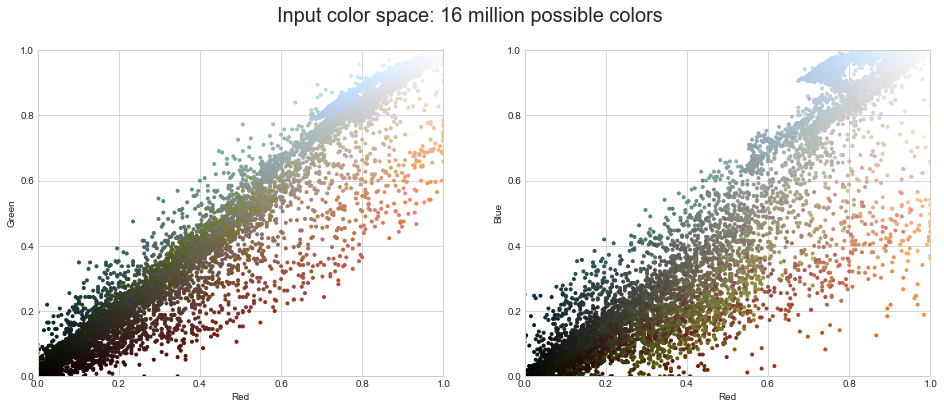

In [22]:
plot_pixels(data, title='Input color space: 16 million possible colors')

<span style="color: grey;">
Now let's reduce these 16 million colors to just 16 colors, using a *k*-means clustering across the pixel space.
Because we are dealing with a very large dataset, we will use the mini-batch *k*-means, which operates on subsets of the data to compute the result (shown in the following figure) much more quickly than the standard *k*-means algorithm:
</span>

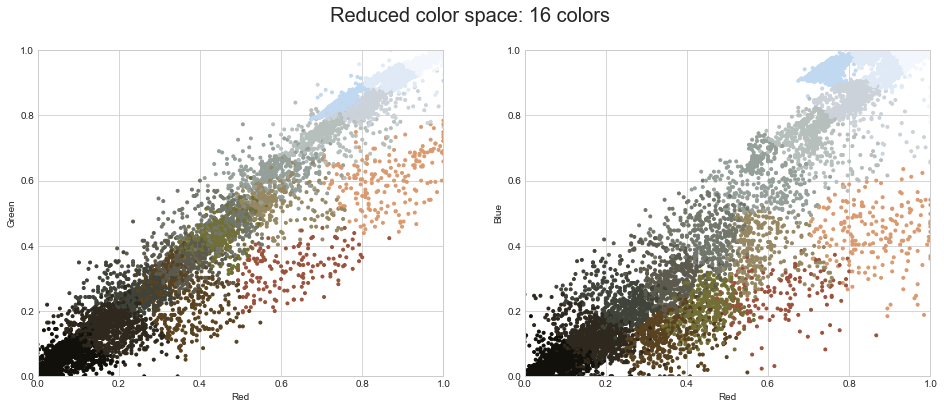

In [23]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

<span style="color: grey;">s
The result is a recoloring of the original pixels, where each pixel is assigned the color of its closest cluster center.
Plotting these new colors in the image space rather than the pixel space shows us the effect of this (see the following figure):
</span>

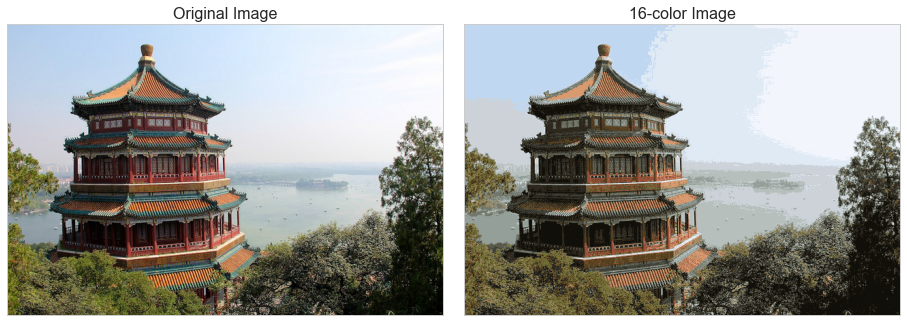

In [24]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

<span style="color: grey;">
Some detail is certainly lost in the rightmost panel, but the overall image is still easily recognizable.
In terms of the bytes required to store the raw data, the image on the right achieves a compression factor of around 1 million!
Now, this kind of approach is not going to match the fidelity of purpose-built image compression schemes like JPEG, but the example shows the power of thinking outside of the box with unsupervised methods like *k*-means.
</span>

### Example 3 - Customer Segmentation

#### Introduction
Datset From: https://www.kaggle.com/datasets/sanyamgoyal401/customer-purchases-behaviour-dataset
This dataset contains customer purchase behaviour based on 12 features, those include:
<ul>
<li>Customer id</li>
<li>Age of the customer</li>
<li>gender</li>
<li>Income</li>
<li>Education</li>
<li>Region</li>
<li>Loyality Status - How loyal the status is to a brand</li>
<li>Purchase Frequency</li>
<li>Purchase Amount</li>
<li>Product Category</li>
<li>Promotion Usage - Whether the customer used promotional offfer</li>
<li>Satisfaction Score - 1 to 10 how satisfied was the customer</li>
</ul>
I will use this dataaset to try to find patterns between customers and try to identify segments that customers fit into.

#### Data Import

Here I import the dataset:

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sanyamgoyal401/customer-purchases-behaviour-dataset")

path +="\\customer_data.csv"
print("Path to dataset files:", path)


Path to dataset files: C:\Users\dawid\.cache\kagglehub\datasets\sanyamgoyal401\customer-purchases-behaviour-dataset\versions\1\customer_data.csv


I Convert the data to a pandas DataFrame:

In [6]:
import pandas as pd
df = pd.read_csv(path)
df.head()

id  age  gender  income   education region loyalty_status  \
0   1   27    Male   40682    Bachelor   East           Gold   
1   2   29    Male   15317     Masters   West        Regular   
2   3   37    Male   38849    Bachelor   West         Silver   
3   4   30    Male   11568  HighSchool  South        Regular   
4   5   31  Female   46952     College  North        Regular   

  purchase_frequency  purchase_amount product_category  promotion_usage  \
0           frequent            18249            Books                0   
1               rare             4557         Clothing                1   
2               rare            11822         Clothing                0   
3           frequent             4098             Food                0   
4         occasional            19685         Clothing                1   

   satisfaction_score  
0                   6  
1                   6  
2                   6  
3                   7  
4                   5

#### Data Preprocessing

I drop the id column since it doesn't contribute any information

In [7]:
df.drop(columns='id', inplace=True)
df.head()

age  gender  income   education region loyalty_status purchase_frequency  \
0   27    Male   40682    Bachelor   East           Gold           frequent   
1   29    Male   15317     Masters   West        Regular               rare   
2   37    Male   38849    Bachelor   West         Silver               rare   
3   30    Male   11568  HighSchool  South        Regular           frequent   
4   31  Female   46952     College  North        Regular         occasional   

   purchase_amount product_category  promotion_usage  satisfaction_score  
0            18249            Books                0                   6  
1             4557         Clothing                1                   6  
2            11822         Clothing                0                   6  
3             4098             Food                0                   7  
4            19685         Clothing                1                   5

#### Data Visualisation and metadata

Here I view some metadata about the dataset, such as datatypes per column and count.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   age                 100000 non-null  int64 
 1   gender              100000 non-null  object
 2   income              100000 non-null  int64 
 3   education           100000 non-null  object
 4   region              100000 non-null  object
 5   loyalty_status      100000 non-null  object
 6   purchase_frequency  100000 non-null  object
 7   purchase_amount     100000 non-null  int64 
 8   product_category    100000 non-null  object
 9   promotion_usage     100000 non-null  int64 
 10  satisfaction_score  100000 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 8.4+ MB


Here I check some more metadata such as averages and standard deviation

In [32]:
df.describe().astype('int')

age  income  purchase_amount  promotion_usage  satisfaction_score
count  100000  100000           100000           100000              100000
mean       30   27516             9634                0                   5
std         4   12996             4799                0                   1
min        12    5000             1118                0                   0
25%        27   16271             5583                0                   4
50%        30   27584             9452                0                   5
75%        33   38747            13350                1                   6
max        49   50000            26204                1                  10

I have a look at the histograms of the data

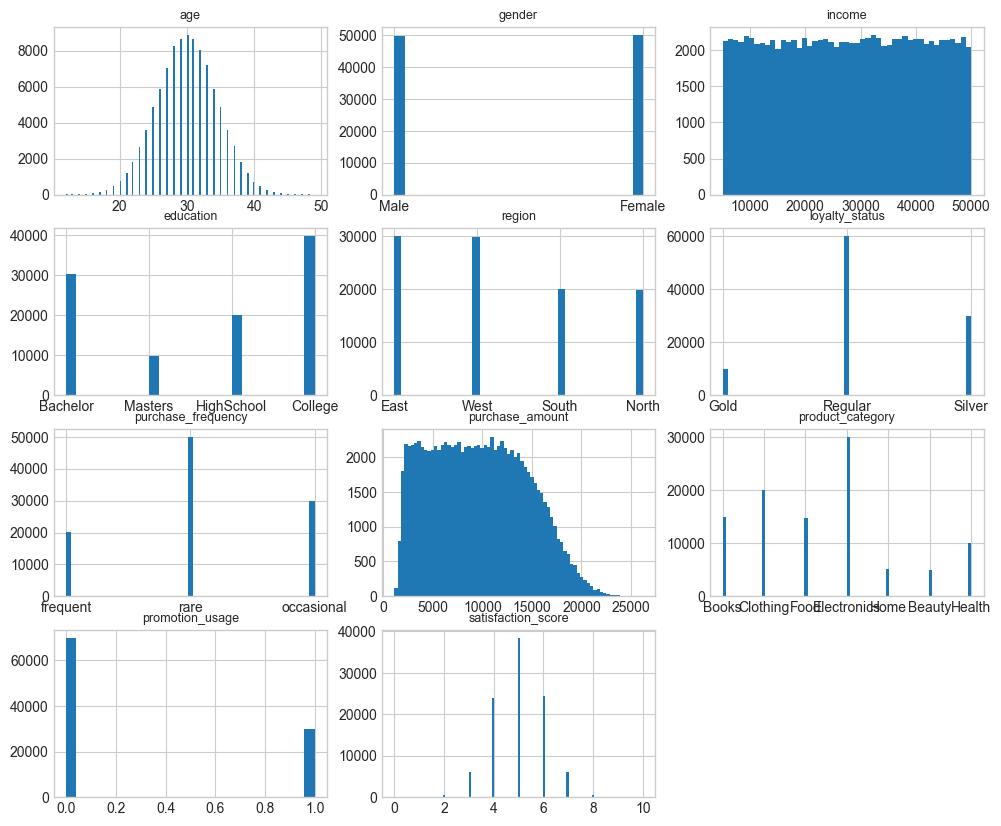

In [41]:
# Shows details about the dataset
plt.figure(figsize=(12,10))
for (i,v) in enumerate(df.columns):
    plt.subplot(4,3,i+1);
    plt.hist(df.iloc[:,i],bins="auto")
    plt.title(v,fontsize=9);

Here I encode the categorical features to numerical values

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

encoder = LabelEncoder()
# Convert each categorical column into numeric values (integers)
for column in df.select_dtypes(include=['object']).columns:
    df[column] = encoder.fit_transform(df[column])

# Convert integer labels to float
df = df.astype(float)

print(df)


        age  gender   income  education  region  loyalty_status  \
0      27.0     1.0  40682.0        0.0     0.0             0.0   
1      29.0     1.0  15317.0        3.0     3.0             1.0   
2      37.0     1.0  38849.0        0.0     3.0             2.0   
3      30.0     1.0  11568.0        2.0     2.0             1.0   
4      31.0     0.0  46952.0        1.0     1.0             1.0   
...     ...     ...      ...        ...     ...             ...   
99995  31.0     0.0  19691.0        1.0     3.0             1.0   
99996  36.0     1.0  17428.0        2.0     2.0             1.0   
99997  29.0     1.0  13222.0        1.0     3.0             1.0   
99998  31.0     0.0  40093.0        0.0     3.0             1.0   
99999  35.0     0.0  22249.0        1.0     3.0             2.0   

       purchase_frequency  purchase_amount  product_category  promotion_usage  \
0                     0.0          18249.0               1.0              0.0   
1                     2.0        

Below I check the correlation matrix for the dataset

In [45]:
df.corr().style.background_gradient(cmap="viridis")

As you can see the results of this matrix are pretty bad, it shows that basically the vast amount of features have barely any impact on each other. <br>
Below I check that the results may differ if I scale the data

In [9]:
# Scales the values
scale = StandardScaler();
df_scaled  = scale.fit_transform(df);
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

age    gender    income  education    region  loyalty_status  \
0 -0.670294  1.001481  1.013004  -1.161470 -1.244518       -2.005686   
1 -0.223916  1.001481 -0.938642   2.024015  1.246693       -0.335200   
2  1.561594  1.001481  0.871969  -1.161470  1.246693        1.335287   
3 -0.000728  1.001481 -1.227100   0.962186  0.416290       -0.335200   
4  0.222461 -0.998521  1.495434  -0.099642 -0.414114       -0.335200   

   purchase_frequency  purchase_amount  product_category  promotion_usage  \
0           -1.661335         1.794883         -1.238811        -0.655901   
1            0.896060        -1.058024         -0.570487         1.524621   
2            0.896060         0.455734         -0.570487        -0.655901   
3           -1.661335        -1.153663          0.766159        -0.655901   
4           -0.382638         2.094092         -0.570487         1.524621   

   satisfaction_score  
0            0.953443  
1            0.953443  
2            0.953443  
3            1.916176  
4           -0.009290

In [62]:
df_scaled.corr().style.background_gradient(cmap="viridis")

As you can see the results barely changed. There are few reasons these are the results, another possible reason is that the data isn't linearly related, so below I check for non linear correlation using spearman's method.

In [22]:
df_scaled.corr(method='spearman').style.background_gradient(cmap="viridis")

This result most likely means that the data is quite poor.

In [23]:
# I just set the normal dataset to the scaled set
df = df_scaled

#### The K-Means Model

I use elbow method to evaluate how many k clusters to set. I took this alorithm from: https://medium.com/@zalarushirajsinh07/the-elbow-method-finding-the-optimal-number-of-clusters-d297f5aeb189

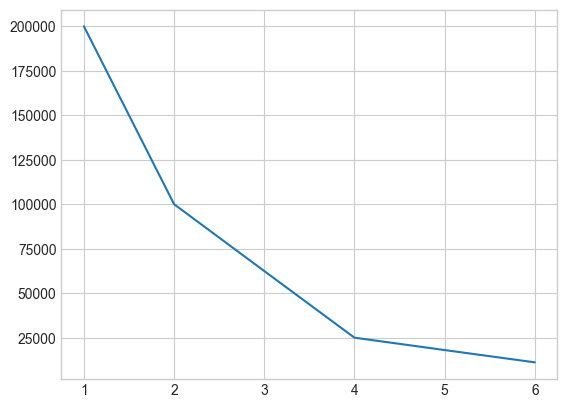

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset=df.iloc[:,[1,2]].values
dataset

from sklearn.cluster import KMeans
WCSS=[]
for i in range(1,7):
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(dataset)
  WCSS.append(kmeans.inertia_)
WCSS

plt.plot(range(1,7),WCSS)

According to this diagram the n-value I should use is most likely 4 thats when the bend becomes the most noticable.

I Dropped majority of the rows so the code would execute on my machine.

In [39]:
df2 = df.sample(frac=1)[:10000]

In [40]:
df2.tail()

age    gender    income  education    region  loyalty_status  \
91085  1.115216 -0.998521  0.034680   0.962186 -1.244518       -0.335200   
62171  0.892027 -0.998521  1.263683   0.962186 -0.414114       -0.335200   
89302 -0.000728  1.001481  0.546656  -0.099642  1.246693        1.335287   
40199  2.231160  1.001481  0.697232  -1.161470 -1.244518       -0.335200   
61347 -1.116671  1.001481  0.150402   0.962186  1.246693       -2.005686   

       purchase_frequency  purchase_amount  product_category  promotion_usage  \
91085            0.896060        -0.386678         -0.570487        -0.655901   
62171           -0.382638         1.325649         -1.907134         1.524621   
89302            0.896060         1.605689          1.434482         1.524621   
40199           -0.382638         1.089157         -0.570487         1.524621   
61347           -1.661335        -0.041004         -0.570487        -0.655901   

       satisfaction_score  
91085           -0.009290  
62171            0.953443  
89302           -0.972024  
40199           -0.009290  
61347           -0.972024

I get he principal components:

In [49]:
from sklearn.decomposition import PCA
# PCA will choose enough principal components to explain 99% of the variance in the data
# mle alternatively will use maximum likelihood estimation to choose the optimal number of components
pca = PCA(n_components="mle")# or set n_components="mle"
# Computes the principal components and transforms the dataset to apply those principal components
X = pca.fit_transform(df2)
print("Nr. of features after PCA = {} (input = {})".format(X.shape[1],df2.shape[1]))

Nr. of features after PCA = 10 (input = 11)


The silhoute model is used to evaluate how many k clusters there is, the algorithm for it was taken from: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

For n_clusters = 2 The average silhouette_score is : 0.12432344420177371
For n_clusters = 3 The average silhouette_score is : 0.10871509896701437
For n_clusters = 4 The average silhouette_score is : 0.09201664201204127
For n_clusters = 5 The average silhouette_score is : 0.08491931015918369
For n_clusters = 6 The average silhouette_score is : 0.08725444907338777


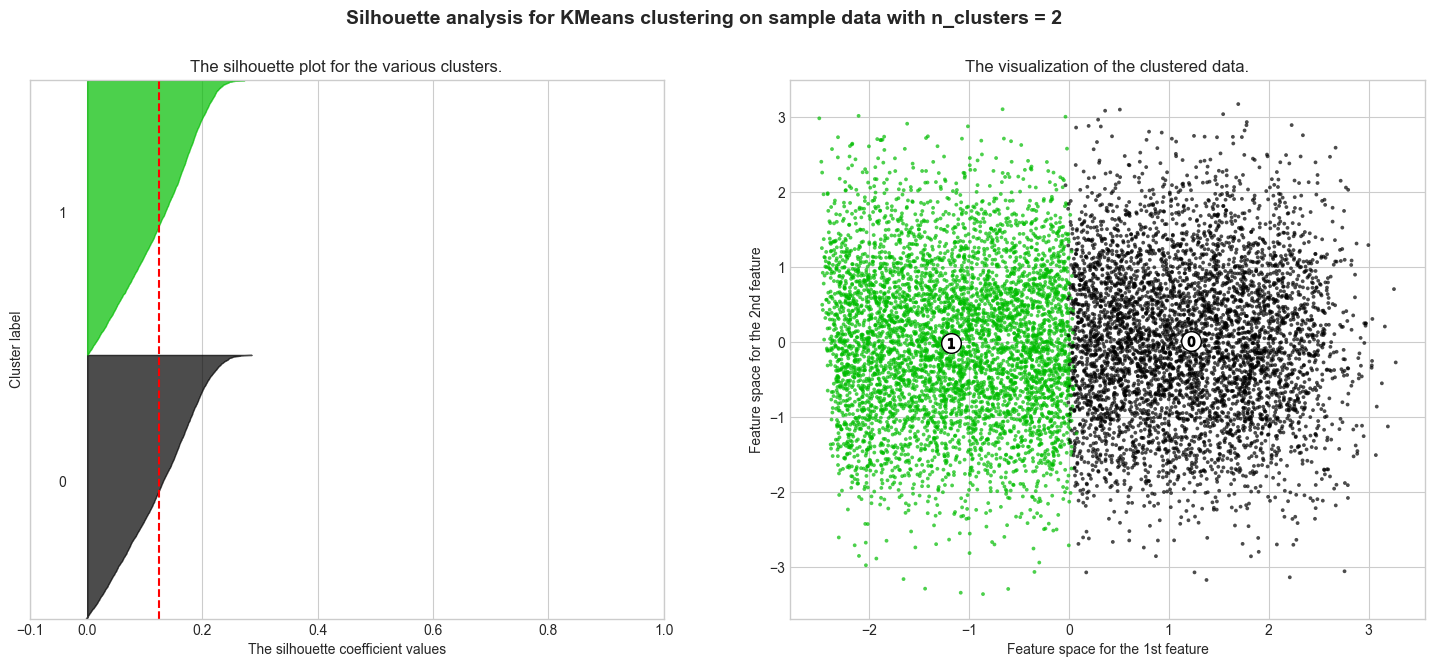

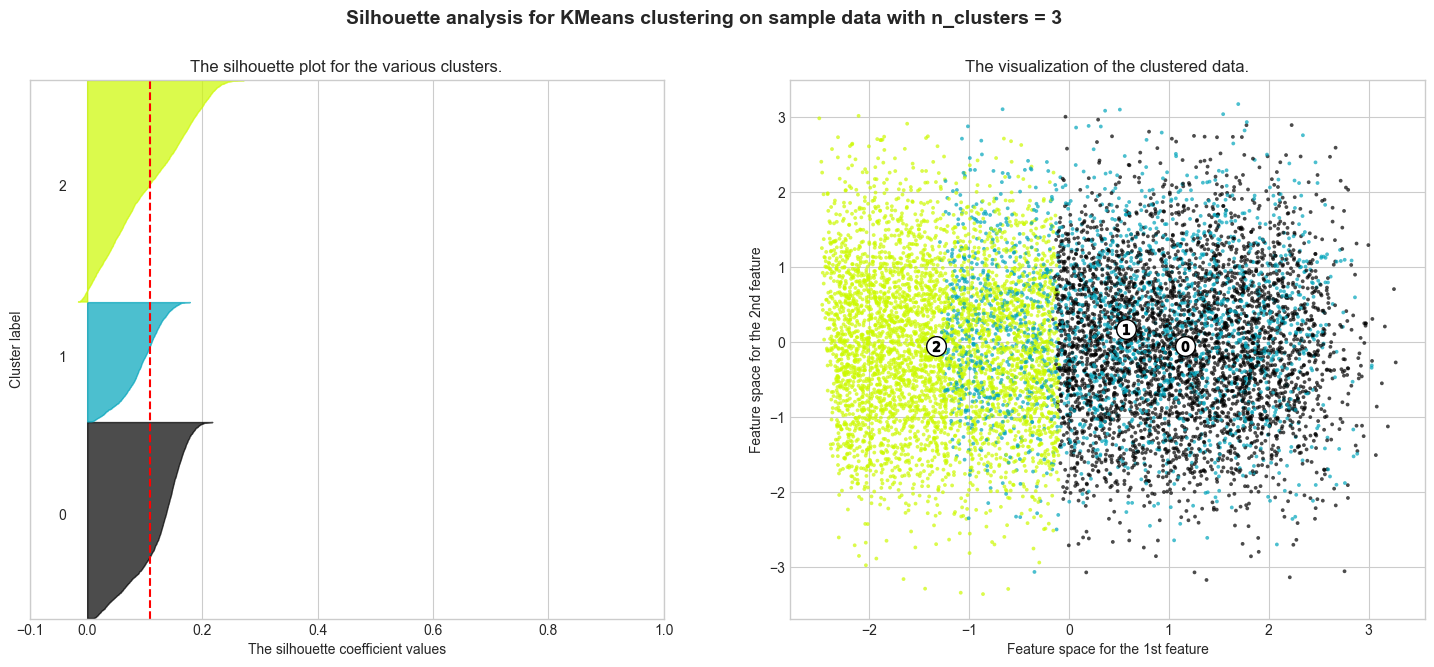

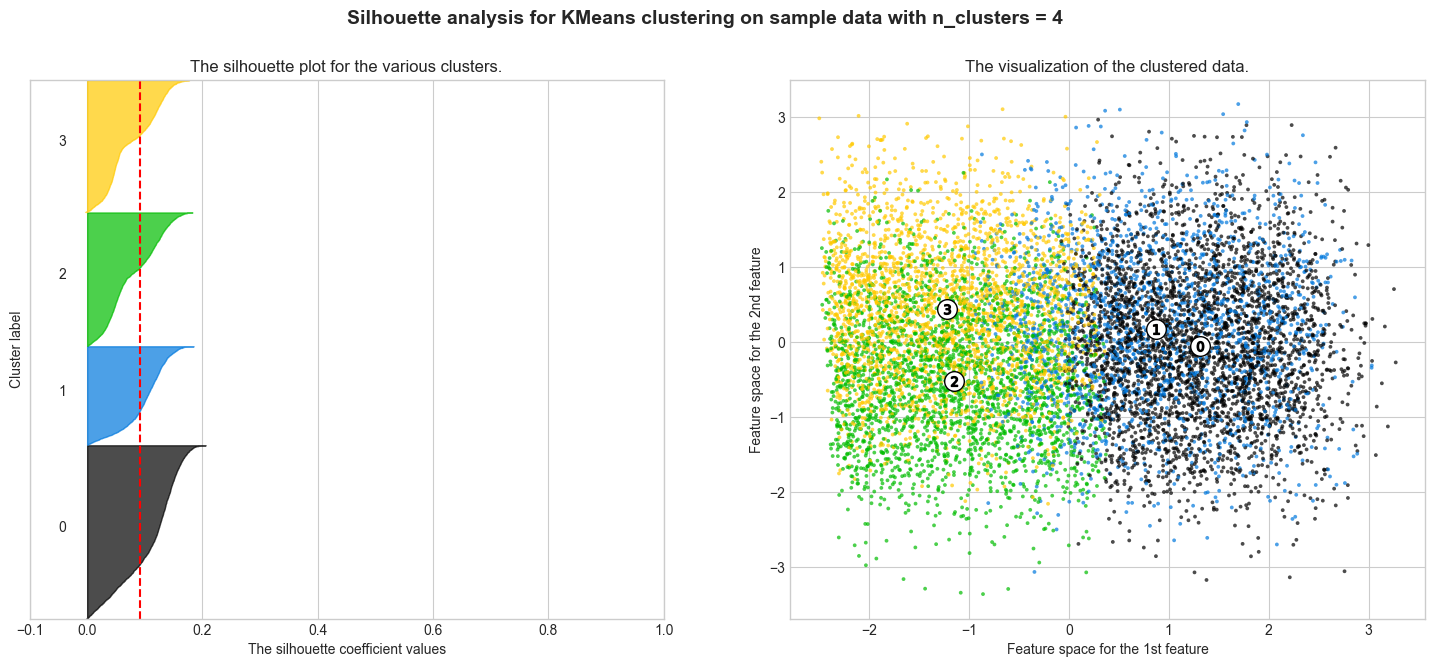

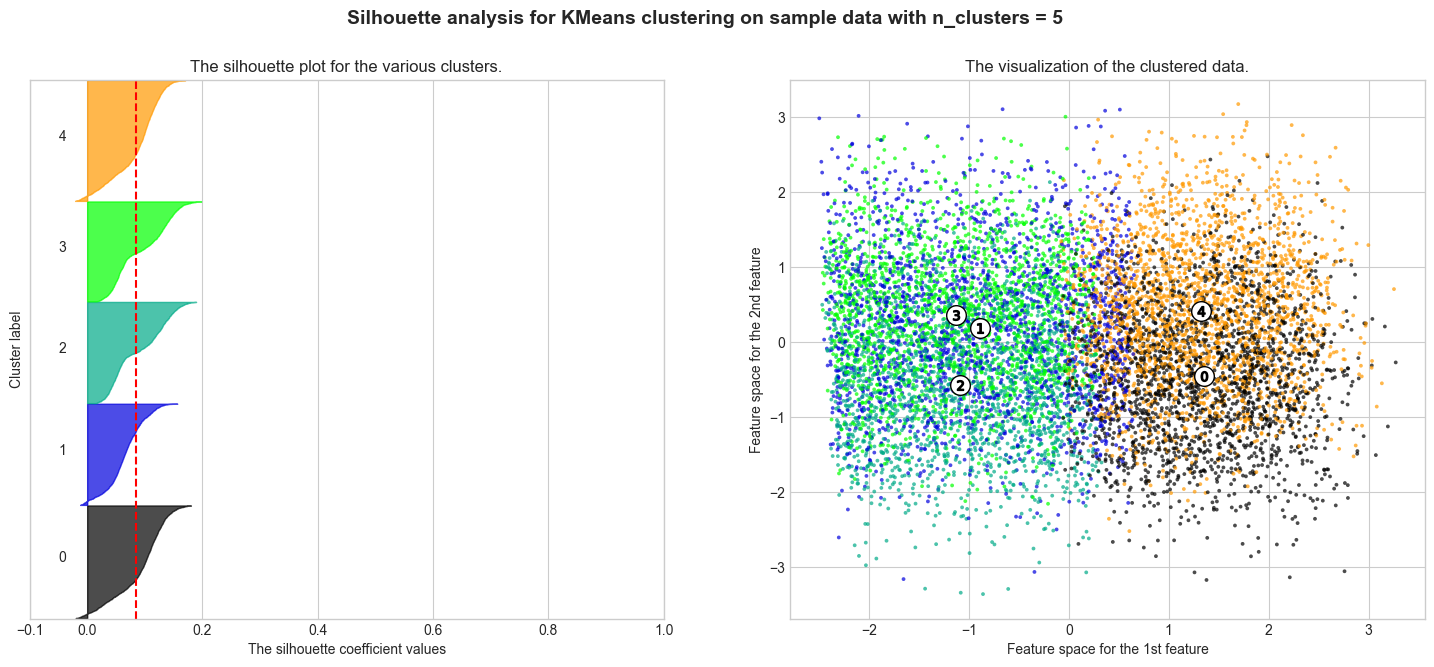

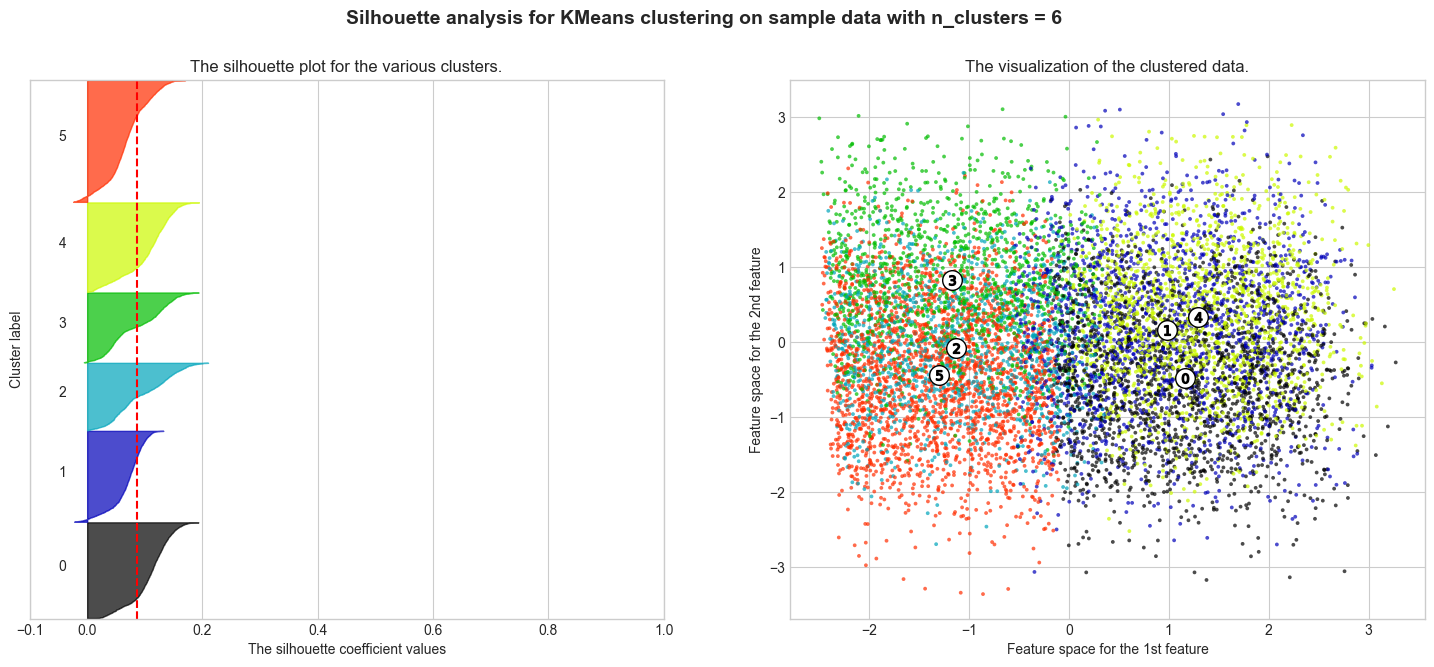

In [52]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

As you can see the k-means gave quite poor results witht a max silhoute average of 0.12 which means that the clusters boundary is on isn't very distinct so the boundary values could go either way.

#### Conclusion
In conclusion the model isn't very effective in segmenting the customers, which is probably due to the dataset beign quite poor and not having any patterns other than a correlation betweem income and purchase amount.